                                             MVA - MCMC
                                             TP3 - Hasting Metropolis and Gibbs samplers
                                        Achari Berrada Youssef 

## Exercice 3: Data augmentation 

We consider 
$$ f(x,y) = \frac{4}{\sqrt{2 \pi}} y^{\frac{3}{2}} \exp \left[ -y \left( \frac{x^2}{2} +2 \right) \right] \mathbb{1}_{\mathbb{R}^+} (y) 
$$

In [172]:
# Import the libraries: 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
from numpy.random import normal
#from scipy.stats import norm
from scipy.stats import gamma 

### Define density f

In [173]:
def f(x,y): 
    # target density 
    return 4/(np.sqrt(2*np.pi)) * (y**(3/2)) * np.exp(-y * ((x**2)/2 + 2))

In [174]:
## Define the meshgrid 
xlist = np.linspace(-3,3,10000)
ylist = np.linspace(0,15,10000)
X,Y = np.meshgrid(xlist, ylist)
Z = f(X,Y)

### Sample from gamma distribution : 

In [175]:
def gamma_sample(x = 1): 
    # Sample y from gamma distribution with parameter alpha = (5/2) and beta = ((x**2) / 2) + 2 
    return gamma.rvs(a = 5/2 , loc = ((x**2) / 2) + 2) 

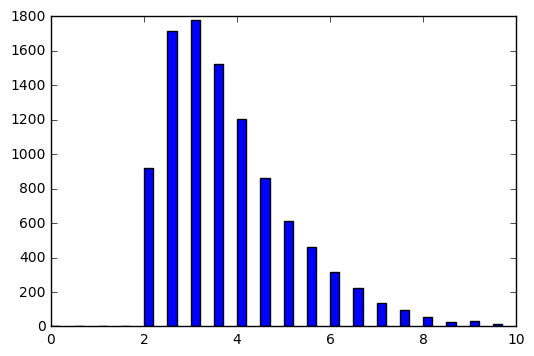

In [176]:
## test gamma sampler 
l = []
for i in range(10000) : 
    l.append(gamma_sample(1))
plt.hist(l,range = (0,10), bins = np.linspace(0,10,21) , width= 0.2);

### Sample from gaussian distribution : 

In [177]:
def gauss_sample(y = 1): 
    # Sample x from gaussian distribution with parameter sigma = 1/y
    return np.sqrt(1/y) * normal()

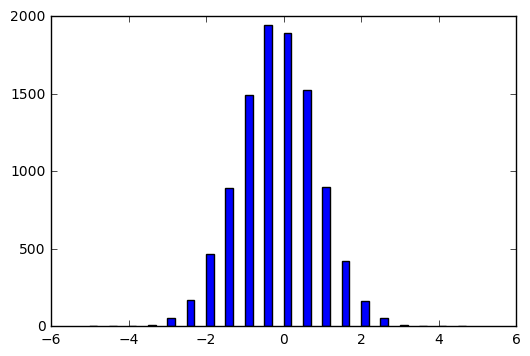

In [178]:
## test gauss sampler 
l = []
for i in range(10000) : 
    l.append(gauss_sample())
plt.hist(l,range = (-5,5), bins = np.linspace(-5,5,21) , width= 0.2);

### Define Gibbs sampler 

In [179]:
def gibbs_sampler(N , x_0 , y_0): 
    # Return a list of pairs of [(x,y)] sampled from density f 
    assert y_0 > 0 # as it is 
    res = np.zeros((N,2))
    res[0,:] = np.array([x_0,y_0])
    x = x_0
    y = y_0 
    for i in range(1,N): 
        x = gauss_sample(y) 
        y = gamma_sample(x)
        res[i,:] = np.array([x,y])
    return res
    

In [180]:
a = gibbs_sampler(1000,0.1,0.2)

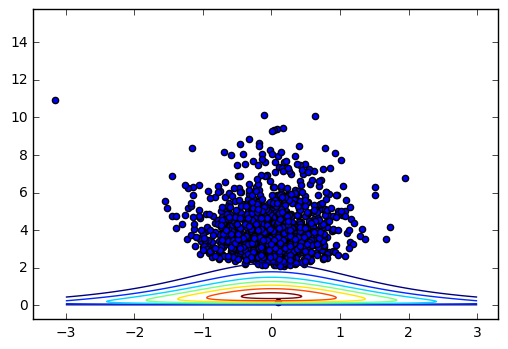

In [182]:
plt.scatter(a[:,0],a[:,1]);
plt.contour(X,Y,Z);

It doesn't seem to be well fitted to the density distribution f ?! 